# Data exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,confusion_matrix,roc_curve,classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.feature_selection import RFECV, RFE,SelectFromModel
from sklearn.svm import SVC
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data=pd.read_csv(r"C:\Users\User\Desktop\New folder (2)\cardio_train.csv")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data.duplicated().sum()

In [5]:
data.drop("id",axis=1,inplace=True)

In [ ]:
data.head()

In [4]:
data["age"]=(data["age"]/365).values.astype(int) 
data["age"]

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [5]:
data["bmi"]=data["weight"]/((data["height"]/100)**2)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


# EDA

<Axes: >

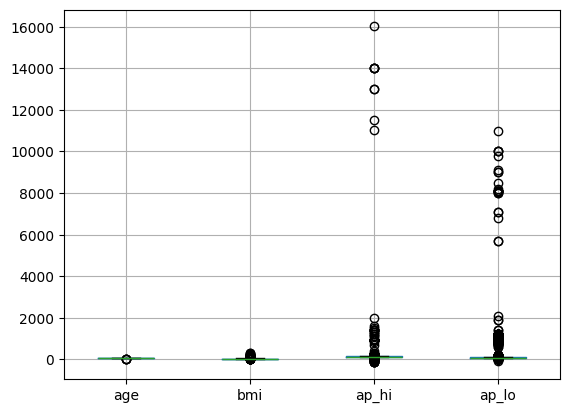

In [6]:
data.boxplot(["age","bmi","ap_hi","ap_lo"])

In [7]:
data_num=data[["age","bmi","ap_hi","ap_lo"]]

In [8]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1
IQR

age      10.000000
bmi       6.347107
ap_hi    20.000000
ap_lo    10.000000
dtype: float64

In [9]:
Outliers=((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis=1)
data=data[~Outliers]

In [10]:
data=data.reset_index(drop=True)

In [11]:
data.boxplot(["age","bmi","ap_hi","ap_lo"])

<Axes: >

# Data Preprocessing

In [12]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

In [13]:
data=pd.get_dummies(data,columns=["gluc"])
data=pd.get_dummies(data,columns=["cholesterol"])

In [14]:
data=data.rename(columns={"gluc_2":"above normal gluc","gluc_3":"well above normal gluc"})
data=data.rename(columns={"cholesterol_2":"above normal chol","cholesterol_3":"well above normal chol"})

In [15]:
data["above normal gluc"]=le.fit_transform(data["above normal gluc"])
data["well above normal gluc"]=le.fit_transform(data["well above normal gluc"])
data["above normal chol"]=le.fit_transform(data["above normal chol"])
data["well above normal chol"]=le.fit_transform(data["well above normal chol"])

In [17]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,gluc_1,above normal gluc,well above normal gluc,cholesterol_1,above normal chol,well above normal chol
0,50,1,168,62.0,110,80,0,0,1,0,21.967120,True,0,0,True,0,0
1,55,0,156,85.0,140,90,0,0,1,1,34.927679,True,0,0,False,0,1
2,51,0,165,64.0,130,70,0,0,0,1,23.507805,True,0,0,False,0,1
3,48,1,169,82.0,150,100,0,0,1,1,28.710479,True,0,0,True,0,0
4,60,0,151,67.0,120,80,0,0,0,0,29.384676,False,1,0,False,1,0


In [16]:
data.drop(["cholesterol_1","gluc_1"],axis=1,inplace=True)

In [17]:
data.drop(["height","weight"],axis=1,inplace=True)

In [18]:
data=data.reindex(columns=["age","bmi","ap_hi","ap_lo","gender","above normal gluc","well above normal gluc","above normal chol","well above normal chol","smoke","alco","active","cardio"])

In [19]:
X=data.iloc[:,:12]
Y=data.iloc[:,12]

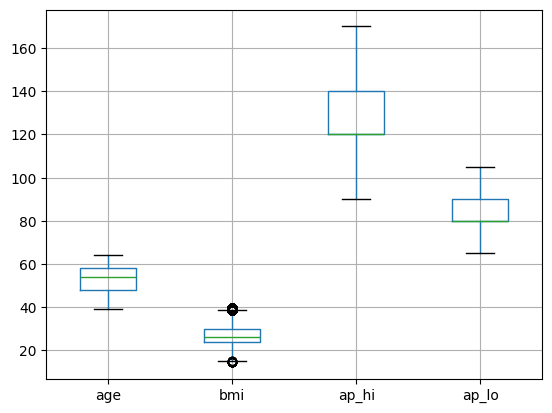

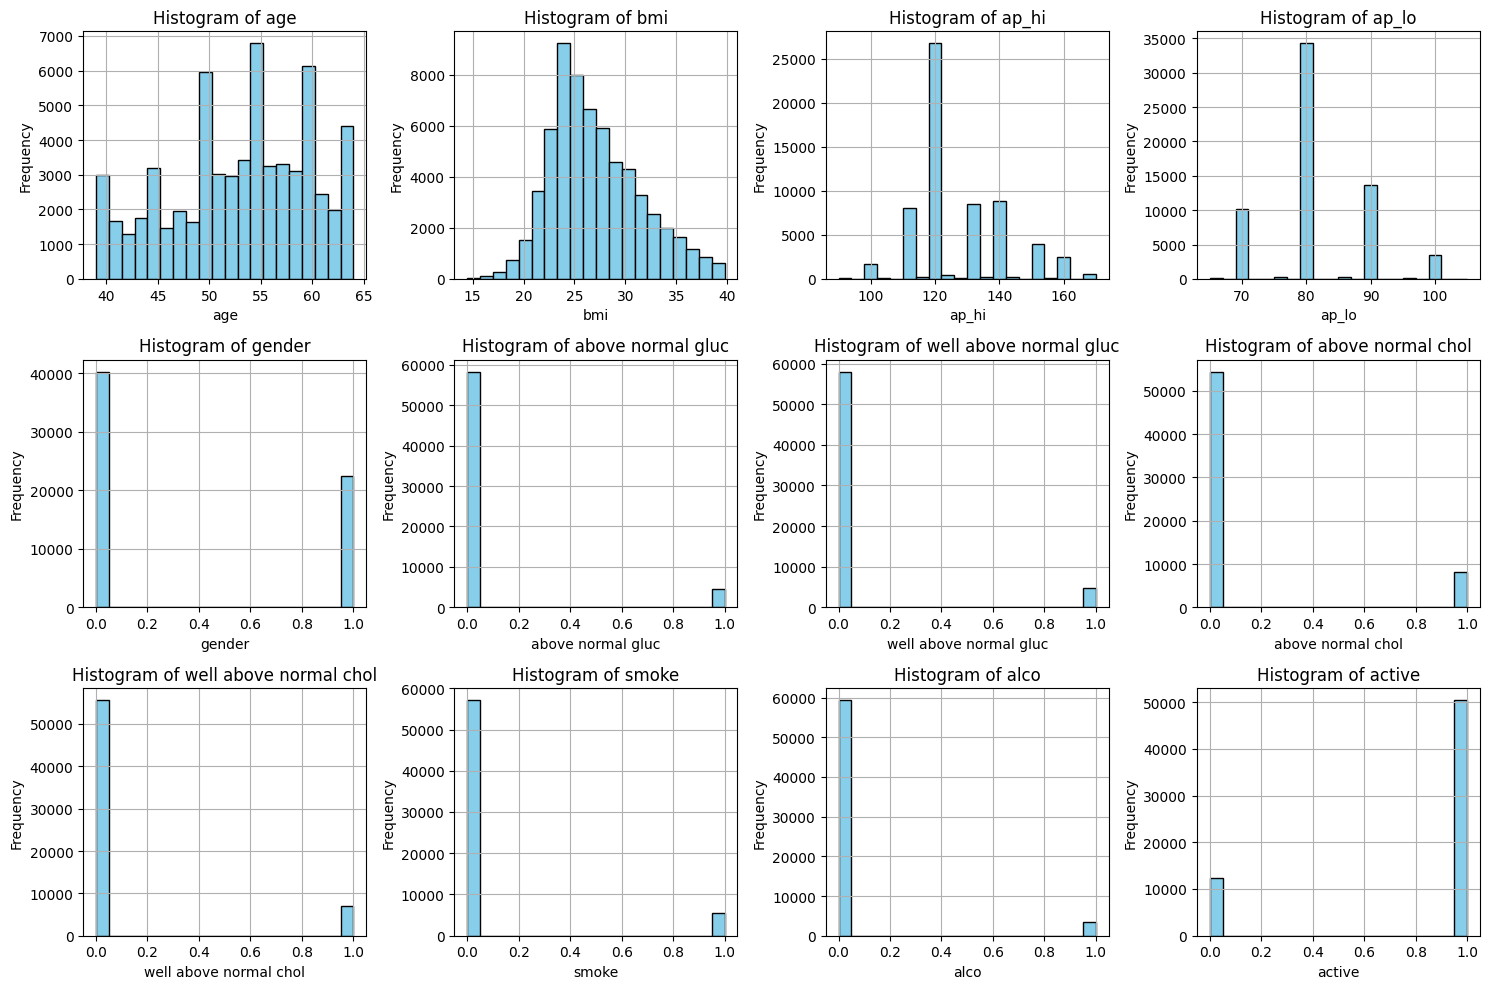

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(X):  # Limit to 12 features
    axes[i].hist(X[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()

plt.show()

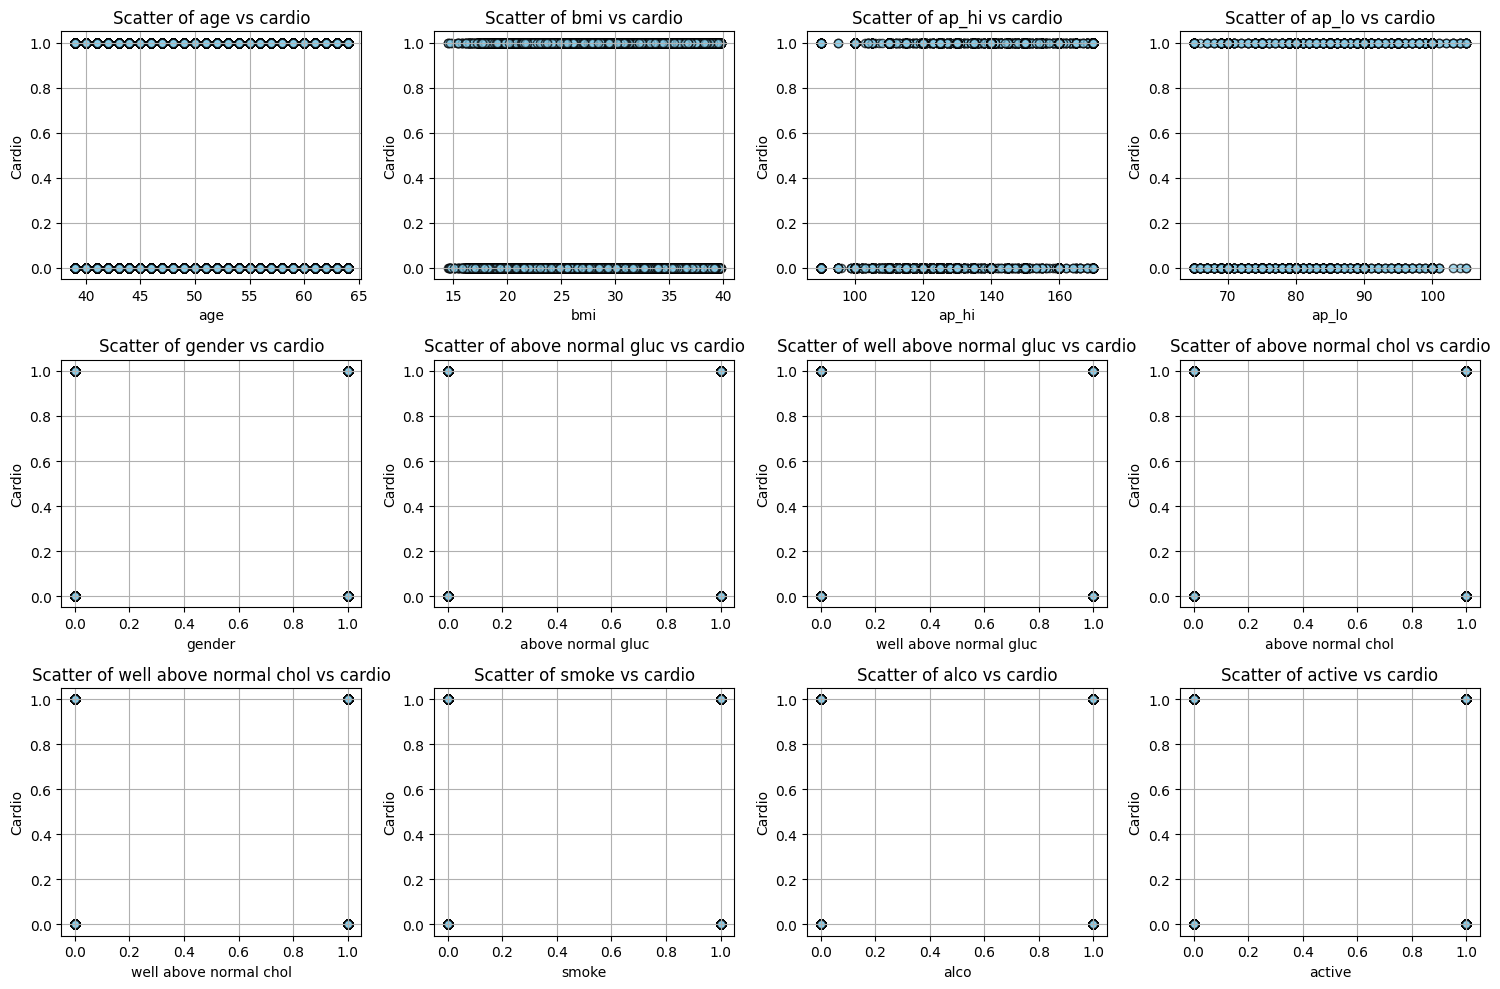

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(X):
    axes[i].scatter(X[column], data["cardio"], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Scatter of {column} vs cardio')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Cardio")
    axes[i].grid(True)

plt.tight_layout()

plt.show()

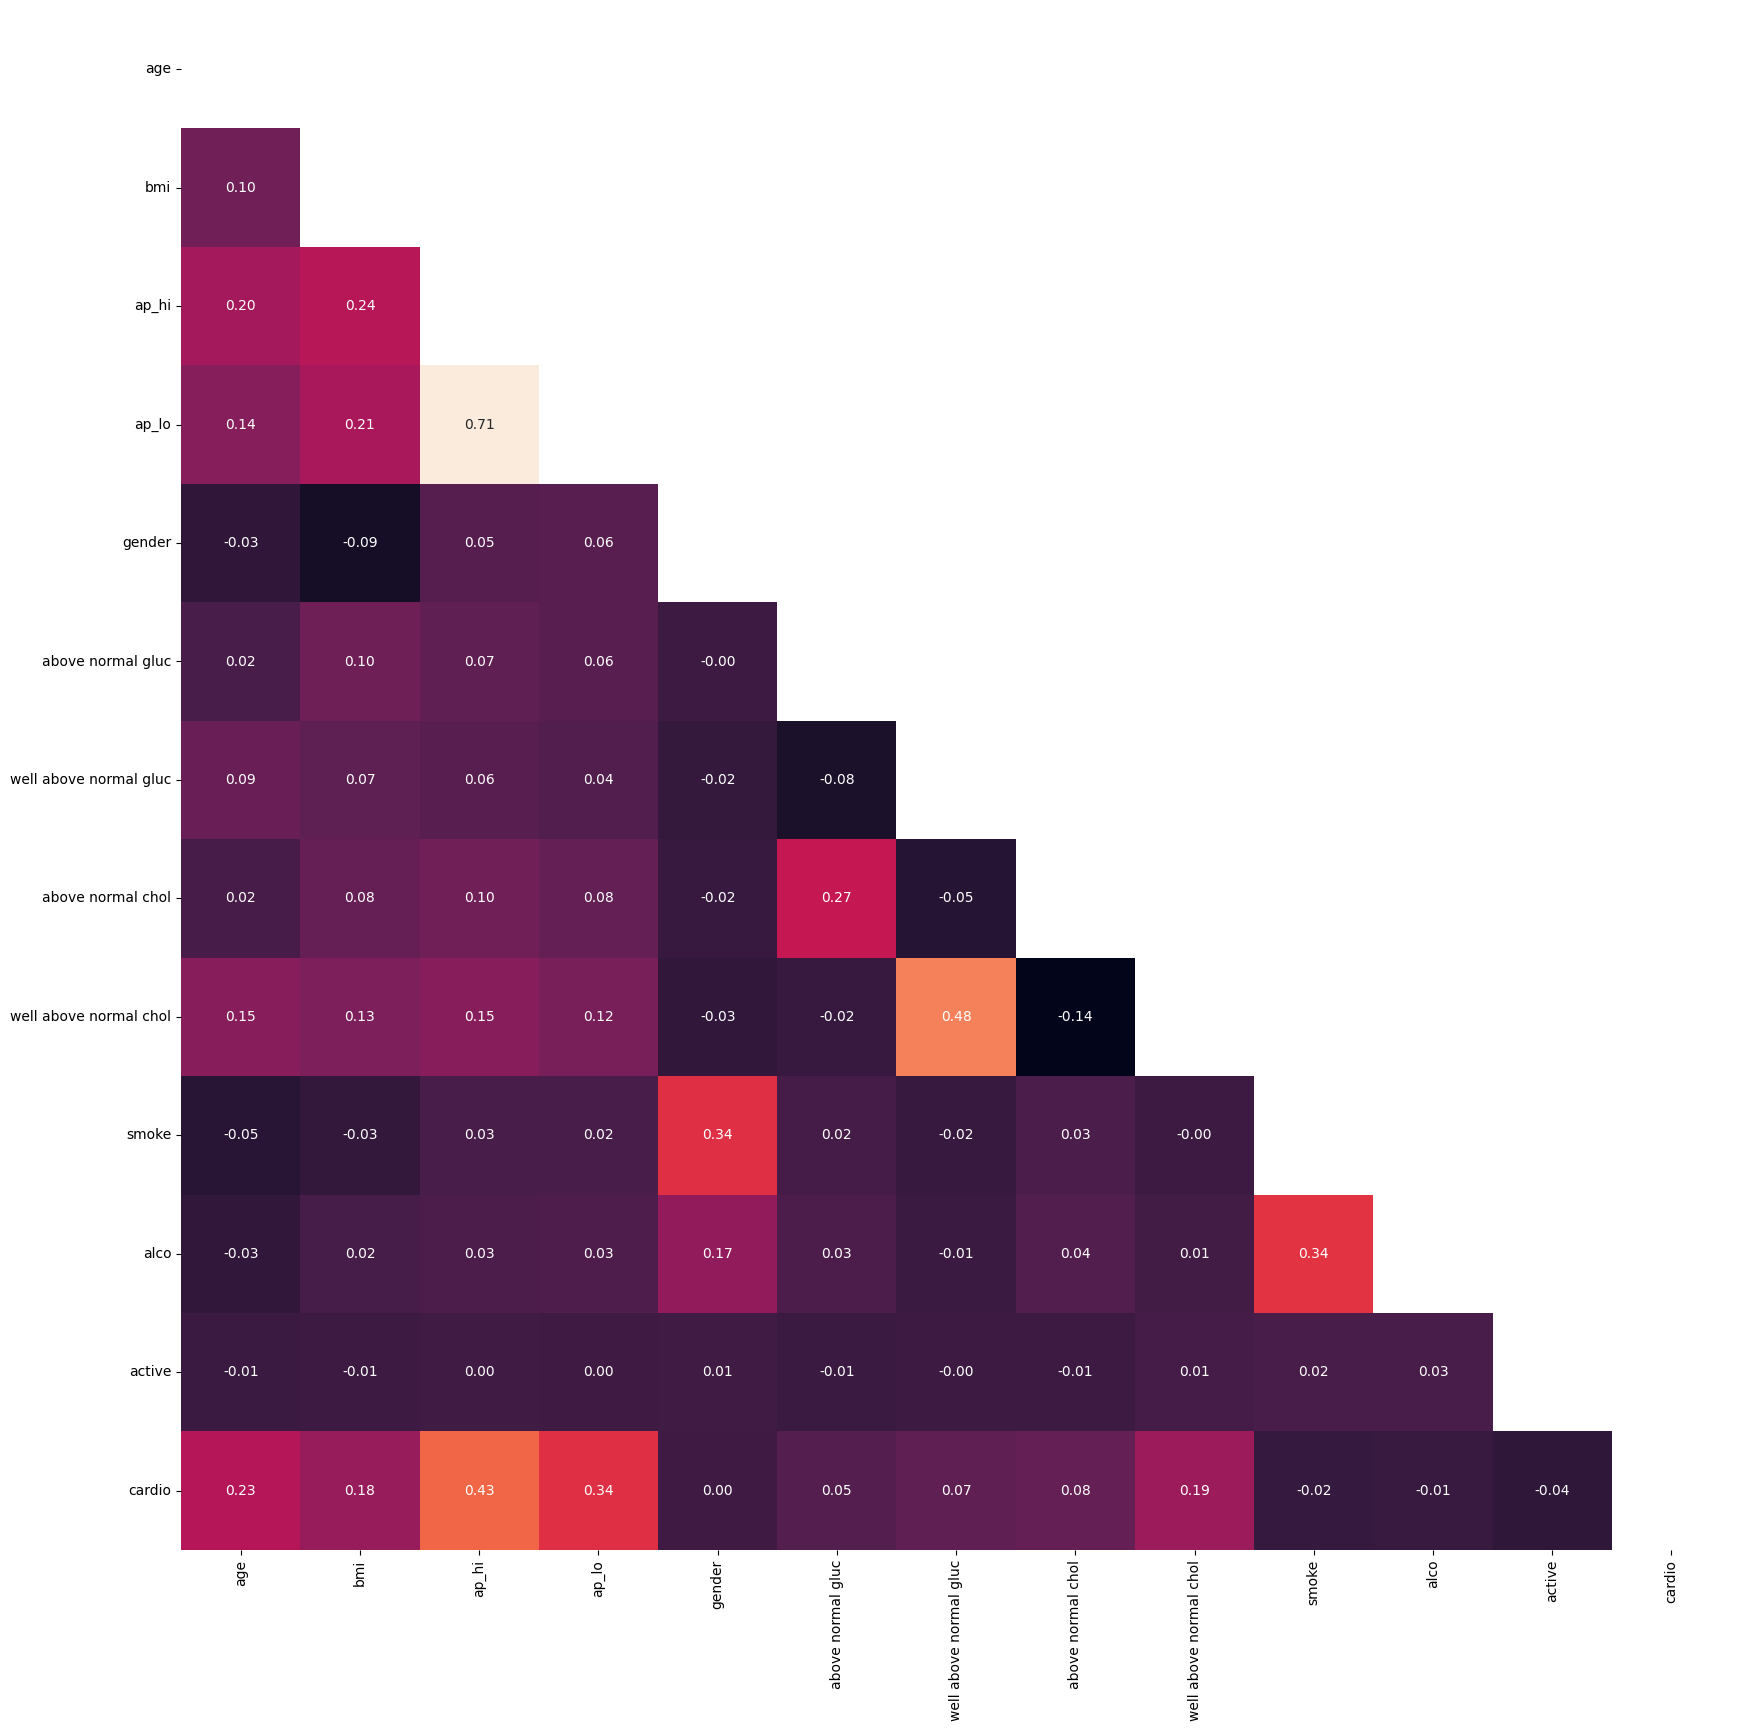

In [23]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(data.corr(method='pearson')),cbar=False)
plt.show()

In [22]:
Scalar=StandardScaler() 
pre_scal=X.iloc[:,:4]
post_scal=Scalar.fit_transform(pre_scal)

In [23]:
X_New=pd.DataFrame(post_scal,columns=["age","bmi","ap_hi","ap_lo"])

In [24]:
X_New

,age,bmi,ap_hi,ap_lo
0,-0.427260,-1.150143,-1.147411,-0.220180
1,0.313890,1.791382,0.950959,1.083017
2,-0.279030,-0.800469,0.251502,-1.523377
3,-0.723719,0.380328,1.650415,2.386213
4,1.055039,0.533344,-0.447954,-0.220180
...,...,...,...,...
62740,0.017430,-0.765601,0.251502,1.083017
62741,0.610349,0.533362,1.650415,-0.220180
62742,-0.130800,-0.024350,-0.447954,-0.220180
62743,1.203269,0.014644,0.601231,-0.220180


In [25]:
X=pd.concat([X_New,data.iloc[:,4:12]],axis=1)
X

,age,bmi,ap_hi,ap_lo,gender,above normal gluc,well above normal gluc,above normal chol,well above normal chol,smoke,alco,active
0,-0.427260,-1.150143,-1.147411,-0.220180,1,0,0,0,0,0,0,1
1,0.313890,1.791382,0.950959,1.083017,0,0,0,0,1,0,0,1
2,-0.279030,-0.800469,0.251502,-1.523377,0,0,0,0,1,0,0,0
3,-0.723719,0.380328,1.650415,2.386213,1,0,0,0,0,0,0,1
4,1.055039,0.533344,-0.447954,-0.220180,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,0.017430,-0.765601,0.251502,1.083017,0,0,0,0,0,0,0,1
62741,0.610349,0.533362,1.650415,-0.220180,0,0,0,0,0,0,0,1
62742,-0.130800,-0.024350,-0.447954,-0.220180,1,0,0,0,0,1,0,1
62743,1.203269,0.014644,0.601231,-0.220180,0,1,0,0,0,0,0,0


In [26]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Hyper Parameter Optimization 

In [47]:
kf=KFold(n_splits=10)

In [46]:
params={"max_iter":[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
params1={"n_neighbors":[10,20,30,40,50,60,70,80,90,100]}
params2={"n_estimators":[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700]}
params3={"C":[1,2,3,4,5,6,7,8,9,10]}


In [45]:
model=XGBClassifier()
# model1=KNeighborsClassifier()
model2=RandomForestClassifier()
# model3=SVC()


In [48]:
gsearch=GridSearchCV(model2,param_grid=params2,cv=kf)
rserach=RandomizedSearchCV(model2,param_distributions=params2,cv=kf)

In [49]:
result1=gsearch.fit(X_Train,Y_Train)
result2=rserach.fit(X_Train,Y_Train)
print(result1.best_params_)
print(result2.best_params_)

KeyboardInterrupt: 

# Model Fitting

In [27]:
LR=LogisticRegression(max_iter=20)
KN=KNeighborsClassifier(n_neighbors=80)
RF=RandomForestClassifier(n_estimators=1200)
Svc=SVC(kernel="rbf",C=1,probability=True)
xgb=XGBClassifier(max_depth=9,
    learning_rate=0.01,
    n_estimators=1200,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.5,
    reg_alpha=1,
    reg_lambda=1,
    scale_pos_weight=1,
    early_stopping_rounds=100,
    tree_method='hist',
    eval_metric='logloss',
    random_state=42)
T1=("knn",KN)
T2=("xgb",xgb)
T3=("svm",Svc)
VC=VotingClassifier(estimators=[T1,T2,T3],voting="hard")

In [43]:
RF.fit(X_Train,Y_Train)

RandomForestClassifier()

In [41]:
xgb.fit(X_Train,Y_Train, eval_set=[(X_Test,Y_Test)],verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
LR.fit(X_Train,Y_Train) 
KN.fit(X_Train,Y_Train)
RF.fit(X_Train,Y_Train)
Svc.fit(X_Train,Y_Train)

SVC(C=1, probability=True)

# Model Evaluation

In [32]:
Y_Pred1=LR.predict(X_Test)
Y_Pred2=KN.predict(X_Test)
Y_Pred3=RF.predict(X_Test)
Y_Pred4=Svc.predict(X_Test)
print(accuracy_score(Y_Test,Y_Pred1))
print(accuracy_score(Y_Test,Y_Pred2))
print(accuracy_score(Y_Test,Y_Pred3))
print(accuracy_score(Y_Test,Y_Pred4))

0.7209339389592796
0.7260339469280421
0.6791776237150371
0.7277073870427923


In [44]:
Y_Pred3=RF.predict(X_Test)
print(accuracy_score(Y_Test,Y_Pred3))

0.6776635588493107


In [36]:
Y_Pred5=VC.predict(X_Test)
print(accuracy_score(Y_Test,Y_Pred5))

0.7256355088054826


In [42]:
Y_Pred6=xgb.predict(X_Test)
print(accuracy_score(Y_Test,Y_Pred6))

0.7277870746673042


In [29]:
X_Train.shape[1]

12

In [60]:
model=Sequential([
    tf.keras.layers.Input(shape=(X_Train.shape[1],)),
    tf.keras.layers.Dense(64,activation="relu"),
    Dropout(0.3),
    tf.keras.layers.Dense(32,activation="relu"),
    Dropout(0.3),
    tf.keras.layers.Dense(16,activation="relu"),
    Dropout(0.3),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [61]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [63]:
history=model.fit(
    X_Train,Y_Train,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1,
    validation_split=0.2
), 

Epoch 1/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6809 - auc: 0.7384 - loss: 0.6034 - val_accuracy: 0.7308 - val_auc: 0.7968 - val_loss: 0.5596
Epoch 2/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7245 - auc: 0.7793 - loss: 0.5681 - val_accuracy: 0.7327 - val_auc: 0.7966 - val_loss: 0.5546
Epoch 3/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7298 - auc: 0.7856 - loss: 0.5613 - val_accuracy: 0.7323 - val_auc: 0.7976 - val_loss: 0.5553
Epoch 4/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7274 - auc: 0.7883 - loss: 0.5579 - val_accuracy: 0.7297 - val_auc: 0.7986 - val_loss: 0.5580
Epoch 5/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7255 - auc: 0.7838 - loss: 0.5612 - val_accuracy: 0.7324 - val_auc: 0.7982 - val_loss: 0.5529
Epoch 6/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7301 - auc: 0.7888 - loss: 0.5559 - val_accuracy: 0.7305 - val_auc: 0.7981 - val_loss: 0.5523
Epoch 7/100
1255/1255 

1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7334 - auc: 0.7962 - loss: 0.5455 - val_accuracy: 0.7300 - val_auc: 0.7983 - val_loss: 0.5479
Epoch 43/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7329 - auc: 0.7959 - loss: 0.5459 - val_accuracy: 0.7313 - val_auc: 0.7987 - val_loss: 0.5475
Epoch 44/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7281 - auc: 0.7878 - loss: 0.5540 - val_accuracy: 0.7332 - val_auc: 0.7986 - val_loss: 0.5477
Epoch 45/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7339 - auc: 0.7967 - loss: 0.5452 - val_accuracy: 0.7337 - val_auc: 0.7984 - val_loss: 0.5468
Epoch 46/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7344 - auc: 0.7944 - loss: 0.5460 - val_accuracy: 0.7326 - val_auc: 0.7984 - val_loss: 0.5473
Epoch 47/100
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7327 - auc: 0.7965 - loss: 0.5457 - val_accuracy: 0.7333 - val_auc: 0.7985 - val_loss: 0.5476
Epoch 48/100
1255/1255 ━━━━━━

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

AttributeError: 'tuple' object has no attribute 'history'

In [64]:
Y_Pred6=model.predict(X_Test)
y_pred = (Y_Pred6 > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(Y_Test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_Test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(Y_Test, y_pred))

393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      6415
           1       0.76      0.65      0.70      6134

    accuracy                           0.73     12549
   macro avg       0.73      0.73      0.73     12549
weighted avg       0.73      0.73      0.73     12549


Confusion Matrix:
[[5176 1239]
 [2152 3982]]

ROC-AUC Score: 0.7280137465148956


In [ ]:
comparison_df = pd.DataFrame({
    'Actual': Y_Test,   
    'Predicted': Y_Pred4 
})


comparison_df.head(50)

In [ ]:
joblib.dump(VC, 'VC_Model.pkl')

In [ ]:
confusion_matrix(Y_Test,Y_Pred2)

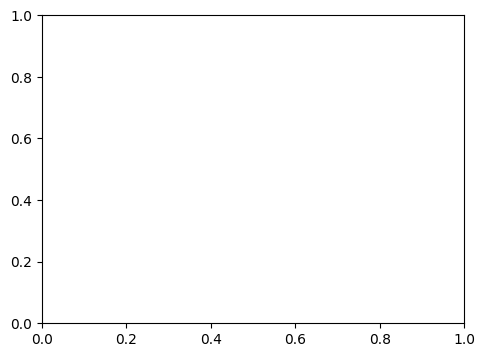

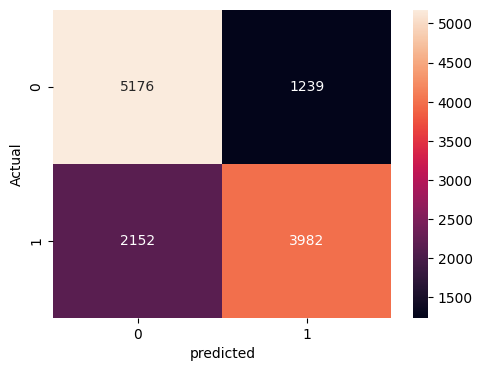

In [68]:
sns.heatmap(confusion_matrix(Y_Test,y_pred),annot=True,fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_Test,Y_Pred2))

In [ ]:
y_pred_probs= KN.predict_proba(X_Test)

In [ ]:
fpr,tpr,_=roc_curve(Y_Test,y_pred_probs[:,1])

In [ ]:
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.show()

In [ ]:
roc_auc_score(Y_Test,y_pred_probs[:,1])

In [ ]:
model=SVC(kernel="linear")

In [ ]:
l1_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.1,max_iter=130)
l2=KNeighborsClassifier(n_neighbors=80)

In [ ]:
rfe=RFE(estimator=model,n_features_to_select=8)

In [ ]:
result=rfe.fit(X_Train,Y_Train)

In [ ]:
result.support_

In [ ]:
selected=X.columns[result.support_]
print(selected)

In [ ]:
X=X[selected]
X.head()

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
l1_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.1,max_iter=130)

In [ ]:
Svc=SVC(kernel="linear",C=3,probability=True)

In [ ]:
lr=Svc.fit(X_Train,Y_Train)

In [ ]:
pr=lr.predict(X_Test)
print(accuracy_score(Y_Test,pr))

In [ ]:
sns.heatmap(confusion_matrix(Y_Test,pr),annot=True,fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def Std_Scalar(pre_scale):
    Scalar1=StandardScaler() 
    post_scale=Scalar1.fit_transform(pre_scale)
    return post_scale

In [ ]:
age=input("Age")
gender=input("gender")
height=input("Height")
weight=input("weight")
sys_blood=input("Systolic blood pressure")
dys_blood=input("Diastolic blood pressure ")
chol=input("Cholesterol")
glucose=input("Glucose")
smoking=input("Smoking")
alcohol=input("Alcohol")
physical_activity=input("Pysical activity")

inputs={}
user_data = {
    "Age": age,
    "Gender": gender,
    "Height": height,
    "Weight": weight,
    "Systolic Blood Pressure": sys_blood,
    "Diastolic Blood Pressure": dys_blood,
    "Cholesterol": chol,
    "Glucose": glucose,
    "Smoking": smoking,
    "Alcohol Consumption": alcohol,
    "Physical Activity": physical_activity
}
prol=process(user_data)
prol.shape
print(prol)
prediction = Svc.predict(prol)
print("Predicted value:", prediction[0])

In [ ]:
def process(user_data):
    cd={
        "ag":0,
        "wg":0,
        "ac":0,
        "wc":0
    }
 
    user_data["Gender"] = 1 if user_data["Gender"] == "Male" else 0
    
    user_data["Smoking"] = 1 if user_data["Smoking"].lower() in ["yes", "y", "1"] else 0
    
    user_data["Alcohol Consumption"] = 1 if user_data["Alcohol Consumption"].lower() in ["yes", "y", "1"] else 0
    

    user_data["Physical Activity"] = 1 if user_data["Physical Activity"].lower() in ["regular", "yes", "y", "1"] else 0

    cholesterol = float(user_data["Cholesterol"])
    glucose = float(user_data["Glucose"])

    bmi=float(user_data["Weight"])/((float(user_data["Height"])/100)**2)
    
    test_val=np.array([int(user_data["Age"]),bmi,float(user_data["Systolic Blood Pressure"]),float(user_data["Diastolic Blood Pressure"])])
    
    test_val=test_val.reshape(1,-1)
    
    mod=Std_Scalar(test_val)
    
    
    mod=mod.reshape(1,-1)
    
    if cholesterol < 200:
        user_data["Cholesterol"] = 1
    elif 200 <= cholesterol <= 239:
        cd["ag"] = 1
    else:
        cd["wg"] = 1

    if glucose < 100:
        user_data["Glucose"] = 1
    elif 100 <= glucose <= 125:
        cd["ac"] = 1
    else:
        cd["wc"] = 1
    post1=np.array([user_data["Gender"],cd["ag"],cd["wg"],cd["ac"]])
    post2=np.array([cd["wc"],user_data["Smoking"],user_data["Alcohol Consumption"],user_data["Physical Activity"]])
    post1=post1.reshape(1,-1)
    post2=post2.reshape(1,-1)
    prol = np.concatenate(
    (mod,post1.astype(int),post2.astype(int)),
    axis=1  # Concatenate along columns (axis=1)
    )
    return prol


In [ ]:
# test_val=np.array([51,23.507805130,130,70,0,0,0,0,1,0,0,0])
# X_user = test_val.reshape(1, -1)
# prescl=np.array([X_user[0][0],X_user[0][1],X_user[0][2],X_user[0][3]])
# prescl=prescl.reshape(1,-1)
# mod=Std_Scalar(prescl)
# mod.reshape(1,-1)
# prol = np.concatenate(
#     (mod, X_user[:, 4:].astype(int)),
#     axis=1  # Concatenate along columns (axis=1)
# )
